## Graphs

This is mainly for the shortest path project, but is helpful in general. There are both information here for existing modules (packages) and a user-defined one. 

First, let's look at the Graph package

In [1]:
using Graphs, Plots, GraphRecipes

In [2]:
g = complete_graph(5)

{5, 10} undirected simple Int64 graph

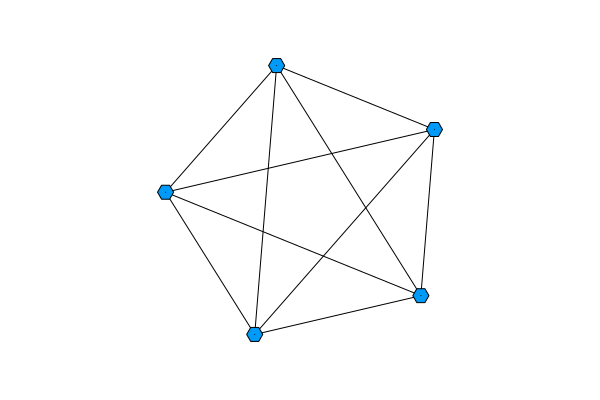

In [3]:
graphplot(g, curves=false)

In [4]:
g2 = SimpleGraph()

{0, 0} undirected simple Int64 graph

In [5]:
graphplot(g2)

LoadError: MethodError: reducing over an empty collection is not allowed; consider supplying `init` to the reducer

In [6]:
add_vertices!(g2,3)
add_edge!(g2,1,2)
add_edge!(g2,2,3)
add_edge!(g2,3,1)

true

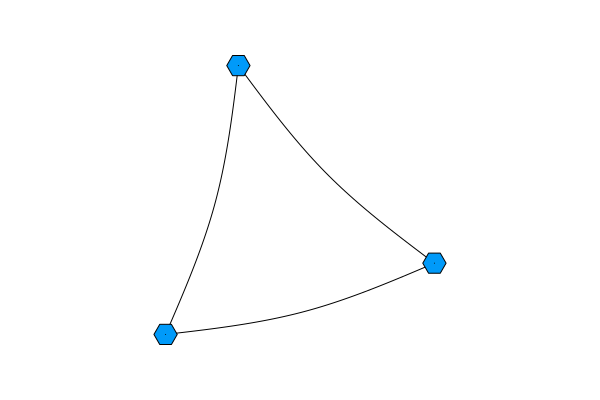

In [7]:
graphplot(g2)

Now we will use a user-defined package to handle weighted graphs. Take a look at the code.

In [8]:
using Revise

In [25]:
includet("../Sci-Comp-ShortestPath/WeightedGraphsCopy.jl")
using .WeightedGraphs

The package has a Vertex, which has a name (as a Symbol)

In [26]:
v1 = Vertex(:A)
v2 = Vertex(:B)
v3 = Vertex(:C)

Vertex(:C)

Consider a `WeightedGraph`

In [37]:
g = WeightedGraph()

WeightedGraph(Vertex[], Main.WeightedGraphs.Edge[], SimpleGraph{Int64}(0, Vector{Int64}[]))

Add the three vertices defined above.

In [38]:
addVertex!(g,v1)
addVertex!(g,v2)
addVertex!(g,v3)

3-element Vector{Vertex}:
 Vertex(:A)
 Vertex(:B)
 Vertex(:C)

Since `Edge` is also in the `Graphs` package, we clarify that we want the one in the `WeightedGraphs` package:

In [39]:
e1 = WeightedGraphs.Edge(:A,:B,3)
e2 = WeightedGraphs.Edge(:B,:C,5)
e3 = WeightedGraphs.Edge(:C,:A,7)

Main.WeightedGraphs.Edge(:C, :A, 7)

Add the three edges

In [40]:
addEdge!(g,e1)
addEdge!(g,e2)
addEdge!(g,e3)

true

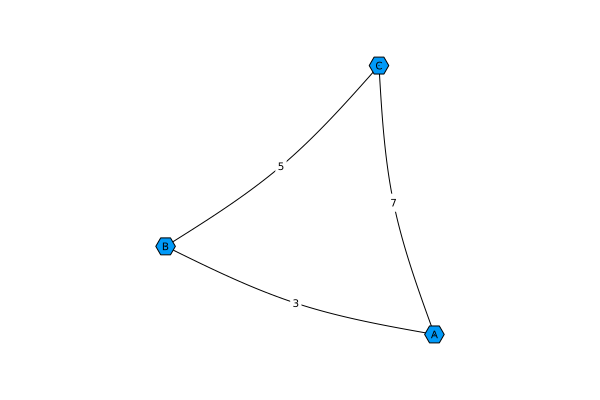

In [41]:
graphplot(g.graph, names=["A","B","C"], edgelabel = Dict((1,2)=>3,(2,3)=>5,(1,3) => 7))

One of the things to do in the project is to plot a graph with `plotgraph(g)` and it should add the vertex labels and the edge labels.

In [73]:
plotgraph(g)

┌ Error: Failed to revise C:\Users\Camer\Documents\My-Repositories\Sci-Comp-ShortestPath\WeightedGraphsCopy.jl
│   exception = (LoadError("C:\\Users\\Camer\\Documents\\My-Repositories\\Sci-Comp-ShortestPath\\WeightedGraphsCopy.jl", 135, "incomplete: \"module\" at C:\\Users\\Camer\\Documents\\My-Repositories\\Sci-Comp-ShortestPath\\WeightedGraphsCopy.jl:1 requires end"), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00000000a6735e06])
└ @ Revise C:\Users\Camer\.julia\packages\Revise\do2nH\src\packagedef.jl:717


LoadError: UndefVarError: plotgraph not defined

In [67]:
g.vertices

3-element Vector{Vertex}:
 Vertex(:A)
 Vertex(:B)
 Vertex(:C)

In [70]:
Vertex(:A) in g.vertices

true

In [59]:
g.edges[1]

Main.WeightedGraphs.Edge(:A, :B, 3)

In [66]:
g.edges[1].start

:A

In [68]:
g.edges[1].finish

:B

In [89]:
for i in 1:length(g.edges)
    if Vertex(:A) == g.edges[i].start && Vertex(:B) == g.edges[i].finish
        return true
    else return false
    end
end

false

In [90]:
VerticesInEdges=[]
for i in 1:length(g.edges)
    push!(VerticesInEdges,(g.edges[i].start, g.edges[i].finish))
end
VerticesInEdges

3-element Vector{Any}:
 (:A, :B)
 (:B, :C)
 (:C, :A)

In [91]:
(:A,:B) in VerticesInEdges

true

In [95]:
length(g.edges)

┌ Error: Failed to revise C:\Users\Camer\Documents\My-Repositories\Sci-Comp-ShortestPath\WeightedGraphsCopy.jl
│   exception = Revise.ReviseEvalException("C:\\Users\\Camer\\Documents\\My-Repositories\\Sci-Comp-ShortestPath\\none:0", ErrorException("invalid redefinition of constant Path"), Any[(top-level scope at none:0, 1)])
└ @ Revise C:\Users\Camer\.julia\packages\Revise\do2nH\src\packagedef.jl:715


3

In [98]:
Path(Vertex(:A),
 Vertex(:B),
 Vertex(:C))

LoadError: UndefVarError: Path not defined

In [ ]:
p[i] == g.edges[j].start && p[i+1] == g.edges[j].finish